In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [13]:
from robustsp import *

In [14]:
''' 
#fix seed of random number generator for reproducibility
random.seed(2)

# Number of measurements
N = 100

# DC voltage in AWGN
x_N_minus1 = np.random.randn(N-1,1)+5
'''

# Number of measurements
N = 100

# Load matlab generated samples
x_N_minus1 = scipy.io.loadmat('x_N_minus1.mat',struct_as_record=False)
x_N_minus1 = x_N_minus1['x_N_minus1']

# outlier values
delta_x = np.linspace(0,10,1000)

In [15]:
# sensitivity curve for mean
SC_mean = np.zeros(delta_x.shape)
mu_hat = np.mean(x_N_minus1)
for ii in range(len(delta_x)):
    SC_mean[ii] = N*(np.mean(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)

In [16]:
# sensitivity curve for median
SC_med = np.zeros(delta_x.shape)
mu_hat = np.median(x_N_minus1)
for ii in range(len(delta_x)):
    SC_med[ii] = N*(np.median(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)   

In [17]:
# sensitivity curve for Huber's location estimator
c = 1.3415
SC_hub = np.zeros(delta_x.shape)
mu_hat = MLocHUB(x_N_minus1,c)
for ii in range(len(delta_x)):
    SC_hub[ii] = N*(MLocHUB(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat)  

In [18]:
# sensitivity curve for Tukey's location estimator
c = 4.68
SC_tuk = np.zeros(delta_x.shape)
mu_hat = MLocTUK(x_N_minus1,c)
for ii in range(len(delta_x)):
    SC_tuk[ii] = N*(MLocTUK(np.append(x_N_minus1,delta_x[ii])) 
                     - mu_hat) 

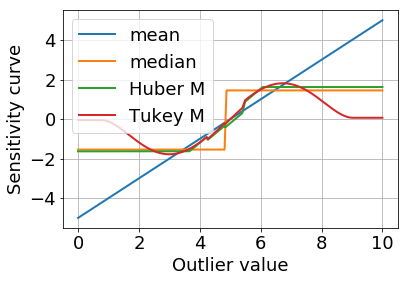

In [19]:
plt.rcParams.update({'font.size': 18})

plt.plot(delta_x,SC_mean-np.mean(SC_mean), label ='mean', linewidth=2.0)
plt.plot(delta_x,SC_med-np.mean(SC_med), label='median', linewidth=2)
plt.plot(delta_x,SC_hub-np.mean(SC_hub), label='Huber M', linewidth=2)
plt.plot(delta_x,SC_tuk-np.mean(SC_tuk), label ='Tukey M', linewidth=2)

plt.grid(True)

plt.xlabel('Outlier value')
plt.ylabel('Sensitivity curve')
plt.legend()

plt.show()